## Transfer Learning VGG 16 and VGG 19 using Keras

In [ ]:
# import all the dependencies
# insert all the images 
# initialize the resnet (include_top=False) donot forget to do this 
# dont train the existing weights 
# create the prediction and also create a model object 
# compile the model
# You can also use ImageDatagenerator 
# read the data from the directories 
# fit the model and run it
# save the model
# predict on the test data
# now do prediction for new dataset and convert it into array 




Please download the dataset from the below url

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

2024-02-08 14:17:40.470058: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-08 14:17:40.546197: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-08 14:17:40.546944: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-08 14:17:41.988850: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [26]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'


In [27]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
# [3] is added for the RGB colors 
#initializing resnet 
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)





In [28]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [29]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False
    

In [24]:
  # useful for getting number of output classes
folders = glob('Datasets/Train/*')

In [25]:
folders

['Datasets/Train/lamborghini',
 'Datasets/Train/audi',
 'Datasets/Train/mercedes']

In [30]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [31]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [32]:

# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [33]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [34]:
# Use the Image Data Generator to import the images from the dataset
#ImageDataGenerator it is similar to the roboflow  and is to be done in training set only not in testing 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [35]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [36]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [37]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/tmp/ipykernel_4956/4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50


2024-02-08 14:44:31.739417: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2024-02-08 14:44:31.903869: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2024-02-08 14:44:31.987926: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 106463232 exceeds 10% of free system memory.
2024-02-08 14:44:32.074698: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2024-02-08 14:44:32.164117: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.


2/2 [==============================] - 19s 11s/step - loss: 5.9894 - accuracy: 0.2969 - val_loss: 9.6380 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 13s 9s/step - loss: 9.2638 - accuracy: 0.2969 - val_loss: 6.9912 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 13s 9s/step - loss: 5.7092 - accuracy: 0.2500 - val_loss: 9.9572 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 13s 10s/step - loss: 6.3821 - accuracy: 0.3906 - val_loss: 8.1937 - val_accuracy: 0.1897
Epoch 5/50
2/2 [==============================] - 13s 9s/step - loss: 4.7557 - accuracy: 0.4375 - val_loss: 3.9300 - val_accuracy: 0.1897
Epoch 6/50
2/2 [==============================] - 14s 10s/step - loss: 1.7150 - accuracy: 0.5000 - val_loss: 2.1528 - val_accuracy: 0.5690
Epoch 7/50
2/2 [==============================] - 14s 10s/step - loss: 3.1661 - accuracy: 0.4375 - val_loss: 2.0719 - val_accuracy: 0.5690
Epoch 8/50
2/2 [=========================

In [39]:
r.history

{'loss': [5.98943567276001,
  9.263832092285156,
  5.7092461585998535,
  6.382114410400391,
  4.755745887756348,
  1.7150098085403442,
  3.16611385345459,
  2.289870262145996,
  1.4385442733764648,
  2.2063443660736084,
  1.1708709001541138,
  1.6589065790176392,
  1.0635930299758911,
  0.96331787109375,
  0.7706804275512695,
  0.7960007190704346,
  0.9721953868865967,
  0.6527646780014038,
  0.7023465037345886,
  0.5379023551940918,
  0.6442116498947144,
  0.4354763627052307,
  0.6398626565933228,
  0.40746062994003296,
  0.505064845085144,
  0.37585151195526123,
  0.41504788398742676,
  0.3534025549888611,
  0.362055242061615,
  0.35312312841415405,
  0.37219667434692383,
  0.3119841516017914,
  0.28131794929504395,
  0.2867613732814789,
  0.2705053687095642,
  0.2799067497253418,
  0.24073810875415802,
  0.29308944940567017,
  0.2696398198604584,
  0.2561492323875427,
  0.2037636637687683,
  0.21639606356620789,
  0.201980322599411,
  0.23115214705467224,
  0.2967986762523651,
  0.2

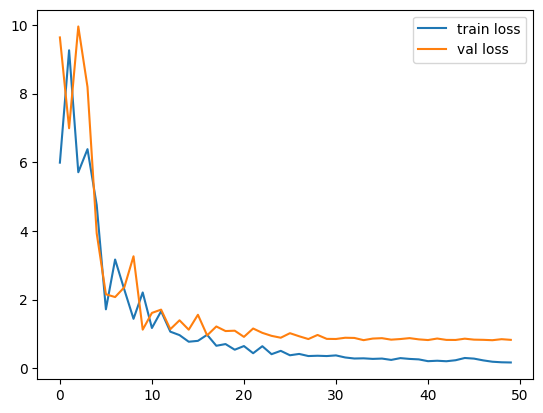

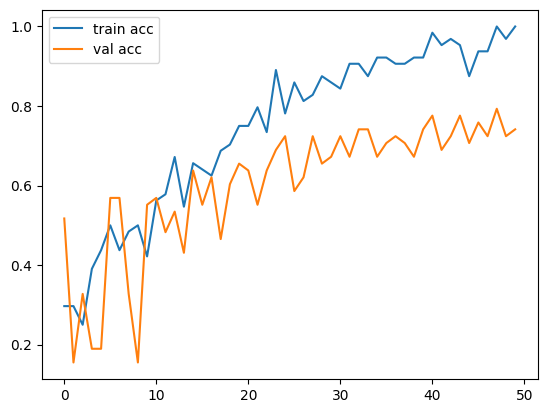

<Figure size 640x480 with 0 Axes>

In [40]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [41]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/home/rushabh/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:

y_pred = model.predict(test_set)


2/2 [==============================] - 6s 3s/step


In [53]:
y_pred


array([[8.6007558e-02, 1.5050595e-02, 8.9894181e-01],
       [1.6477790e-03, 9.8918241e-01, 9.1696847e-03],
       [2.8439924e-02, 4.0932173e-01, 5.6223828e-01],
       [6.2484634e-03, 5.0548065e-01, 4.8827091e-01],
       [1.6032626e-04, 9.9406451e-01, 5.7751071e-03],
       [1.6167578e-01, 6.0485601e-01, 2.3346813e-01],
       [8.5819019e-03, 9.8977005e-01, 1.6480474e-03],
       [3.5108835e-01, 7.4560642e-02, 5.7435095e-01],
       [6.9467470e-02, 3.9532048e-01, 5.3521198e-01],
       [1.4318573e-02, 8.0140615e-01, 1.8427524e-01],
       [8.6643595e-01, 6.0456380e-02, 7.3107623e-02],
       [4.9175829e-02, 9.2272818e-01, 2.8095949e-02],
       [7.0752893e-03, 4.1008368e-02, 9.5191634e-01],
       [2.4347791e-02, 6.2317896e-01, 3.5247323e-01],
       [4.8822383e-03, 3.0426118e-01, 6.9085670e-01],
       [4.5063555e-01, 2.0504728e-01, 3.4431711e-01],
       [3.2648400e-03, 9.7953939e-01, 1.7195739e-02],
       [1.6942324e-01, 6.1869460e-01, 2.1188219e-01],
       [9.1143630e-02, 1.074

In [54]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)


In [55]:
y_pred

array([2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 2, 1, 0, 2])

In [56]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [57]:
model=load_model('model_resnet50.h5')

In [58]:
img_data

NameError: name 'img_data' is not defined

In [59]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [60]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [61]:
x.shape

(224, 224, 3)

In [62]:
x=x/255

In [63]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [64]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[1.8523162e-03, 3.7914093e-04, 9.9776852e-01]], dtype=float32)

In [65]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 180ms/step


In [67]:
a

array([2])